In [130]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import holodeck as holo
import holodeck.single_sources as ss
from holodeck.constants import MSOL, PC, YR, MPC, GYR


In [203]:
edges, number, fobs, exname = ss.example4()
exname = str(number.shape)+' Grid Example'
print(exname)

Number of frequency bins: 11
  between [0.63, 7.57] 1/yr
          [20.00, 240.00] nHz
edges: [array([1.00000000e+39, 1.76139562e+39, 3.10251454e+39, 5.46475552e+39,
       9.62559645e+39, 1.69544835e+40, 2.98635529e+40, 5.26015314e+40,
       9.26521071e+40, 1.63197016e+41, 2.87454509e+41, 5.06321114e+41,
       8.91831794e+41, 1.57086862e+42, 2.76692110e+42, 4.87364272e+42,
       8.58441295e+42, 1.51205474e+43, 2.66332660e+43, 4.69117181e+43,
       8.26300949e+43, 1.45544287e+44, 2.56361071e+44, 4.51553267e+44,
       7.95363948e+44]), array([0.1       , 0.11006942, 0.12115277, 0.13335214, 0.14677993,
       0.16155981, 0.17782794, 0.19573418, 0.21544347, 0.23713737,
       0.26101572, 0.28729848, 0.31622777, 0.34807006, 0.38311868,
       0.4216965 , 0.46415888, 0.51089698, 0.56234133, 0.61896582,
       0.68129207, 0.74989421, 0.82540419, 0.90851758, 1.        ]), array([1.00000000e-03, 1.46779927e-03, 2.15443469e-03, 3.16227766e-03,
       4.64158883e-03, 6.81292069e-03, 1.00000

In [193]:
hc_bg, hc_ss, ssidx, hsamp = ss.ss_by_cdefs(edges, number, realize=30)

In [194]:
marr, qarr, zarr, farr = ss.parameters_from_indices(edges, ssidx)
print(marr.shape)
print(qarr.shape)
print(zarr.shape)
print(farr.shape)

(12, 30)
(12, 30)
(12, 30)
(12, 30)


In [204]:
grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

(2, 2)


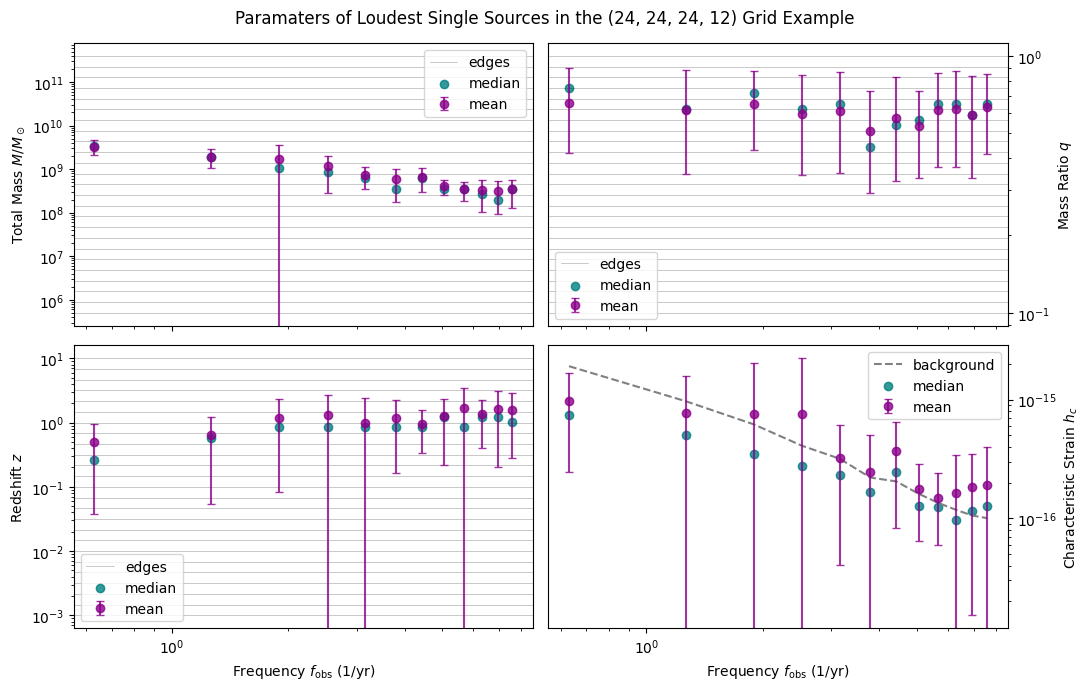

In [209]:
fig, axs = plt.subplots(2, 2, figsize=(11,7), sharex=True)
fig.suptitle('Paramaters of Loudest Single Sources in the '+exname)
# ax = plt.subplot()

titles = np.array([['Total Mass $M/M_\odot$', 'Mass Ratio $q$'], 
                   ['Redshift $z$', 'Characteristic Strain $h_c$']])
params = np.array([[marr/MSOL, qarr], [zarr, hc_ss]])
xlabel = np.array('Frequency $f_\mathrm{obs}$ (1/yr)')


print(grid.shape)
#background strain
axs[1,1].plot(xx, np.median(hc_bg, axis=1), label = 'background',
            color='grey', linestyle='dashed')

for ii in range(len(axs)):
    for jj in range(len(axs)):
        axs[ii,jj].set_ylabel(titles[ii,jj])

        if(ii==0 or jj==0):
            # bin edges
            for kk in range(len(grid[ii,jj])):
                if(kk==0): label='edges'
                else: label=None 
                axs[ii,jj].axhline(grid[ii,jj][kk], color='black', alpha=0.3, lw=0.5, label=label)
            

        axs[ii,jj].errorbar(xx, np.mean(params[ii,jj], axis=1), 
                        yerr = np.std(params[ii,jj], axis=1), label='mean',
                        fmt = 'o', color='darkmagenta', capsize=3, alpha=.8)
        axs[ii,jj].scatter(xx, np.median(params[ii,jj], axis=1), label='median',
                        color='teal', alpha=.8)
        axs[ii,jj].set_yscale('log')
        axs[ii,jj].set_xscale('log')

        

        # axs[ii,jj].fill_between(grid[ii,jj][0], grid[ii,jj][-1])

        if(ii==1): axs[ii,jj].set_xlabel(xlabel)
        if(jj==1):
            axs[ii,jj].yaxis.set_label_position("right")
            axs[ii,jj].yaxis.tick_right()

        axs[ii,jj].legend()

fig.tight_layout()

(2, 2)


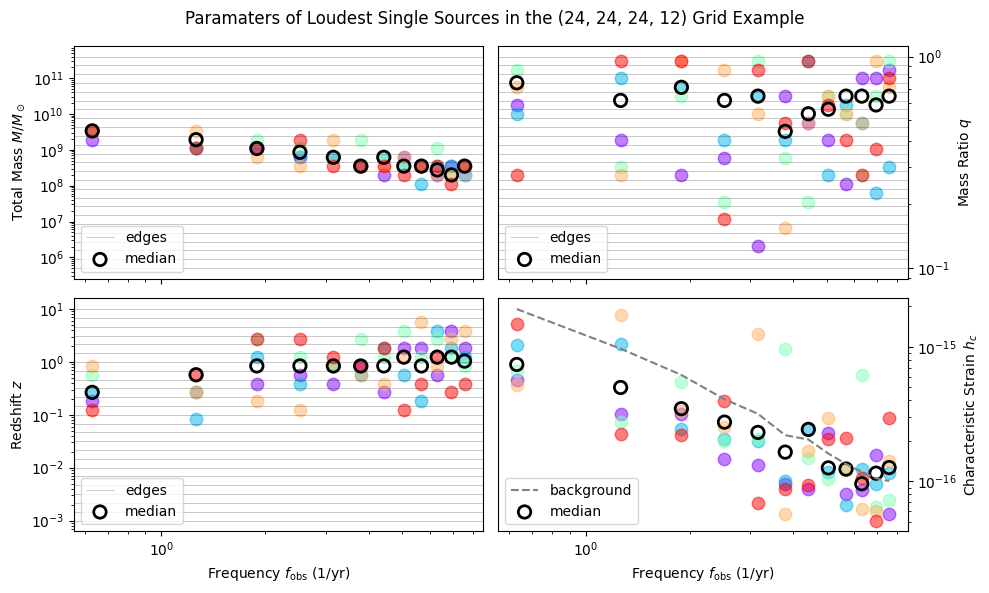

In [210]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle('Paramaters of Loudest Single Sources in the '+exname)
reals = 5
# ax = plt.subplot()

titles = np.array([['Total Mass $M/M_\odot$', 'Mass Ratio $q$'], 
                   ['Redshift $z$', 'Characteristic Strain $h_c$']])
params = np.array([[marr/MSOL, qarr], [zarr, hc_ss]])
xlabel = np.array('Frequency $f_\mathrm{obs}$ (1/yr)')
colors = cm.rainbow(np.linspace(0,1,reals))


print(grid.shape)
#background strain
axs[1,1].plot(xx, np.median(hc_bg, axis=1), label = 'background',
            color='grey', linestyle='dashed')

for ii in range(len(axs)):
    for jj in range(len(axs)):
        axs[ii,jj].set_ylabel(titles[ii,jj])

        if(ii==0 or jj==0): # mass, ratio, or redshift
            # bin edges
            for kk in range(len(grid[ii,jj])):
                if(kk==0): label='edges'
                else: label=None 
                axs[ii,jj].axhline(grid[ii,jj][kk], color='black', alpha=0.3, lw=0.5, label=label)
            
            # single source realizations
            for rr in range(reals):
                axs[ii,jj].scatter(xx, params[ii,jj,:,rr], color=colors[rr],
                                   marker='o', s=80, alpha=0.5)
        
        else: #strain
            for rr in range(reals):
                axs[ii,jj].scatter(xx, params[ii,jj,:,rr], color=colors[rr], 
                                   marker='o', s=80, alpha=0.5)
        # axs[ii,jj].errorbar(xx, np.mean(params[ii,jj], axis=1), 
        #                 yerr = np.std(params[ii,jj], axis=1), label='mean',
        #                 fmt = 'o', color='darkmagenta', capsize=3, alpha=.8)
        axs[ii,jj].scatter(xx, np.median(params[ii,jj], axis=1), label='median',
                        edgecolor='k', linewidth=2, facecolors='none', alpha=1, s=80)
        axs[ii,jj].set_yscale('log')
        axs[ii,jj].set_xscale('log')

        

        # axs[ii,jj].fill_between(grid[ii,jj][0], grid[ii,jj][-1])

        if(ii==1): axs[ii,jj].set_xlabel(xlabel)
        if(jj==1):
            axs[ii,jj].yaxis.set_label_position("right")
            axs[ii,jj].yaxis.tick_right()

        axs[ii,jj].legend(loc='lower left')

fig.tight_layout()

# Example 5
Default SAM with same grid as semi-analytic-model.ipynb example

In [174]:
edges, number, fobs, exname = ss.example5()
exname = str(number.shape)+' Grid Example'
print(exname)

Number of frequency bins: 24
  between [0.10, 2.50] 1/yr
          [3.17, 79.22] nHz
using default mtot, mrat, and redz
edges: [array([1.98840987e+37, 2.60119300e+37, 3.40282209e+37, 4.45149521e+37,
       5.82334576e+37, 7.61796975e+37, 9.96565642e+37, 1.30368473e+38,
       1.70545099e+38, 2.23103257e+38, 2.91858655e+38, 3.81802918e+38,
       4.99465977e+38, 6.53390141e+38, 8.54750264e+38, 1.11816504e+39,
       1.46275832e+39, 1.91354748e+39, 2.50325972e+39, 3.27470797e+39,
       4.28389920e+39, 5.60410044e+39, 7.33115796e+39, 9.59045570e+39,
       1.25460181e+40, 1.64124183e+40, 2.14703559e+40, 2.80870360e+40,
       3.67428278e+40, 4.80661396e+40, 6.28790411e+40, 8.22569452e+40,
       1.07606683e+41, 1.40768639e+41, 1.84150362e+41, 2.40901356e+41,
       3.15141727e+41, 4.12261308e+41, 5.39310957e+41, 7.05514445e+41,
       9.22938105e+41, 1.20736684e+42, 1.57945010e+42, 2.06620105e+42,
       2.70295767e+42, 3.53594833e+42, 4.62564796e+42, 6.05116846e+42,
       7.91600228e+4

In [152]:
hc_bg, hc_ss, ssidx, hsamp = ss.ss_by_cdefs(edges, number, realize=30)

In [153]:
marr, qarr, zarr, farr = ss.parameters_from_indices(edges, ssidx)
print(marr.shape)
print(qarr.shape)
print(zarr.shape)
print(farr.shape)

(25, 30)
(25, 30)
(25, 30)
(25, 30)


In [175]:
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

(2, 2)


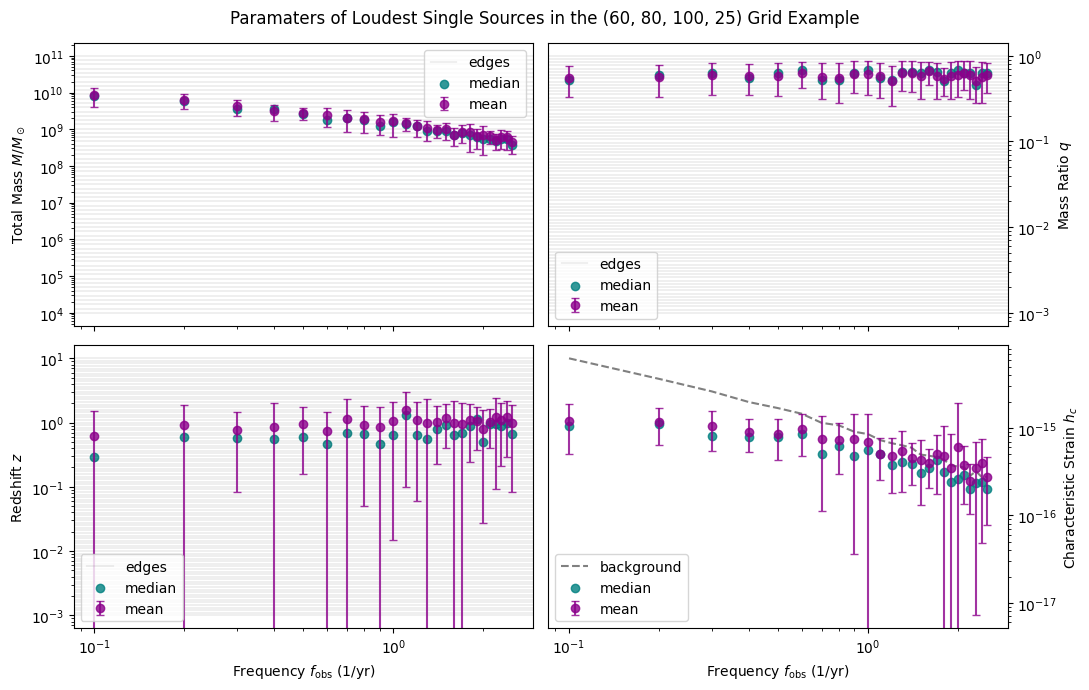

In [191]:
fig, axs = plt.subplots(2, 2, figsize=(11,7), sharex=True)
fig.suptitle('Paramaters of Loudest Single Sources in the '+exname)
# ax = plt.subplot()

titles = np.array([['Total Mass $M/M_\odot$', 'Mass Ratio $q$'], 
                   ['Redshift $z$', 'Characteristic Strain $h_c$']])
params = np.array([[marr/MSOL, qarr], [zarr, hc_ss]])
xlabel = np.array('Frequency $f_\mathrm{obs}$ (1/yr)')


print(grid.shape)
#background strain
axs[1,1].plot(xx, np.median(hc_bg, axis=1), label = 'background',
            color='grey', linestyle='dashed')

for ii in range(len(axs)):
    for jj in range(len(axs)):
        axs[ii,jj].set_ylabel(titles[ii,jj])

        if(ii==0 or jj==0):
            # bin edges
            for kk in range(len(grid[ii,jj])):
                if(kk==0): label='edges'
                else: label=None 
                axs[ii,jj].axhline(grid[ii,jj][kk], color='black', alpha=0.6, lw=0.15, label=label)
            

        axs[ii,jj].errorbar(xx, np.mean(params[ii,jj], axis=1), 
                        yerr = np.std(params[ii,jj], axis=1), label='mean',
                        fmt = 'o', color='darkmagenta', capsize=3, alpha=.8)
        axs[ii,jj].scatter(xx, np.median(params[ii,jj], axis=1), label='median',
                        color='teal', alpha=.8)
        axs[ii,jj].set_yscale('log')
        axs[ii,jj].set_xscale('log')

        

        # axs[ii,jj].fill_between(grid[ii,jj][0], grid[ii,jj][-1])

        if(ii==1): axs[ii,jj].set_xlabel(xlabel)
        if(jj==1):
            axs[ii,jj].yaxis.set_label_position("right")
            axs[ii,jj].yaxis.tick_right()

        axs[ii,jj].legend()

fig.tight_layout()

(2, 2)


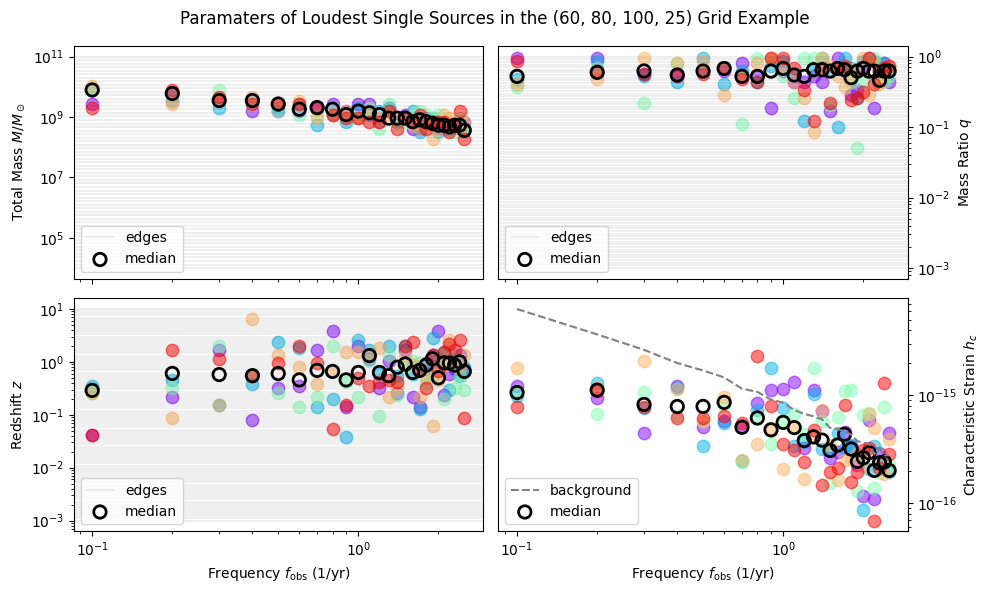

In [189]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle('Paramaters of Loudest Single Sources in the '+exname)
reals = 5
# ax = plt.subplot()

titles = np.array([['Total Mass $M/M_\odot$', 'Mass Ratio $q$'], 
                   ['Redshift $z$', 'Characteristic Strain $h_c$']])
params = np.array([[marr/MSOL, qarr], [zarr, hc_ss]])
xlabel = np.array('Frequency $f_\mathrm{obs}$ (1/yr)')
colors = cm.rainbow(np.linspace(0,1,reals))


print(grid.shape)
#background strain
axs[1,1].plot(xx, np.median(hc_bg, axis=1), label = 'background',
            color='grey', linestyle='dashed')

for ii in range(len(axs)):
    for jj in range(len(axs)):
        axs[ii,jj].set_ylabel(titles[ii,jj])

        if(ii==0 or jj==0): # mass, ratio, or redshift
            # bin edges
            for kk in range(len(grid[ii,jj])):
                if(kk==0): label='edges'
                else: label=None 
                axs[ii,jj].axhline(grid[ii,jj][kk], color='black', alpha=0.6, lw=0.15, label=label)
            
            # single source realizations
            for rr in range(reals):
                axs[ii,jj].scatter(xx, params[ii,jj,:,rr], color=colors[rr],
                                   marker='o', s=80, alpha=0.5)
        
        else: #strain
            for rr in range(reals):
                axs[ii,jj].scatter(xx, params[ii,jj,:,rr], color=colors[rr], 
                                   marker='o', s=80, alpha=0.5)
        # axs[ii,jj].errorbar(xx, np.mean(params[ii,jj], axis=1), 
        #                 yerr = np.std(params[ii,jj], axis=1), label='mean',
        #                 fmt = 'o', color='darkmagenta', capsize=3, alpha=.8)
        axs[ii,jj].scatter(xx, np.median(params[ii,jj], axis=1), label='median',
                        edgecolor='k', linewidth=2, facecolors='none', alpha=1, s=80)
        axs[ii,jj].set_yscale('log')
        axs[ii,jj].set_xscale('log')

        

        # axs[ii,jj].fill_between(grid[ii,jj][0], grid[ii,jj][-1])

        if(ii==1): axs[ii,jj].set_xlabel(xlabel)
        if(jj==1):
            axs[ii,jj].yaxis.set_label_position("right")
            axs[ii,jj].yaxis.tick_right()

        axs[ii,jj].legend(loc='lower left')

fig.tight_layout()